Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import plotly.express as pe
import matplotlib.dates as mdates
import talib as tl
import plotly.express as pe


In [2]:
import os
# print(os.getcwdb())
os.chdir('..')

Exploratory Data Analysis (EDA)
Load and Display News Dataset

In [3]:
news_data = pd.read_csv('./Data/raw_analyst_ratings.csv')
news_data = pd.DataFrame(news_data)
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


Size of Data

In [4]:
news_data.shape

(1407328, 6)

Summary Statistics:
Overview of the dataset

In [5]:
print(news_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None


Missing values

In [6]:
missing_values = news_data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


Descriptive Statistics Of News Dataset
Headline length of news data

In [7]:
headline_lengths = news_data['headline'].apply(len)
headline_lengths.head(10)

0     39
1     42
2     29
3     44
4     87
5     71
6     73
7    120
8     84
9     42
Name: headline, dtype: int64

Count Maximum Maximum of News data headline

In [8]:
np.round(headline_lengths.describe(),2) 

count    1407328.00
mean          73.12
std           40.74
min            3.00
25%           47.00
50%           64.00
75%           87.00
max          512.00
Name: headline, dtype: float64

Number of published articles in specific date

In [9]:
publisher_date_counts = news_data['date'].value_counts()
publisher_date_counts.head(10)

date
2020-03-12 00:00:00    1766
2020-02-27 00:00:00    1292
2020-02-28 00:00:00    1239
2019-08-01 00:00:00    1228
2020-03-06 00:00:00    1147
2018-08-02 00:00:00    1138
2009-08-10 00:00:00    1130
2018-10-30 00:00:00    1129
2018-07-26 00:00:00    1125
2019-07-31 00:00:00    1116
Name: count, dtype: int64

Time Series Analysis

In [10]:
print(news_data['date'].head())
print(news_data['date'].isnull().sum())  # Check for missing values


0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
Name: date, dtype: object
0


Calculate sentiment analysis on news headline using TexBlob 

In [11]:
import os
print(os.getcwd())

d:\week-1\Financial-News-and-Stock-Price-Integration-Analysis-Week-1


In [12]:
import sys
import os

scripts_path = os.path.abspath("../scripts")
if scripts_path not in sys.path:
    sys.path.append(scripts_path)

from scripts.financialAnalysis import get_sentiment
news_data['sentiment_score'] = news_data['headline'].apply(get_sentiment)




Display Calculated Sentiment

In [13]:
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,sentiment_score
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.0


Gauge the sentiment (positive, negative, neutral) associated with the news.


In [14]:
news_data['sentiment_score_word'] = news_data['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))


In [15]:
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,sentiment_score,sentiment_score_word
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0,neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0,neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0,neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0,neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.0,neutral


Sentiment score with respect to date

<Axes: xlabel='date'>

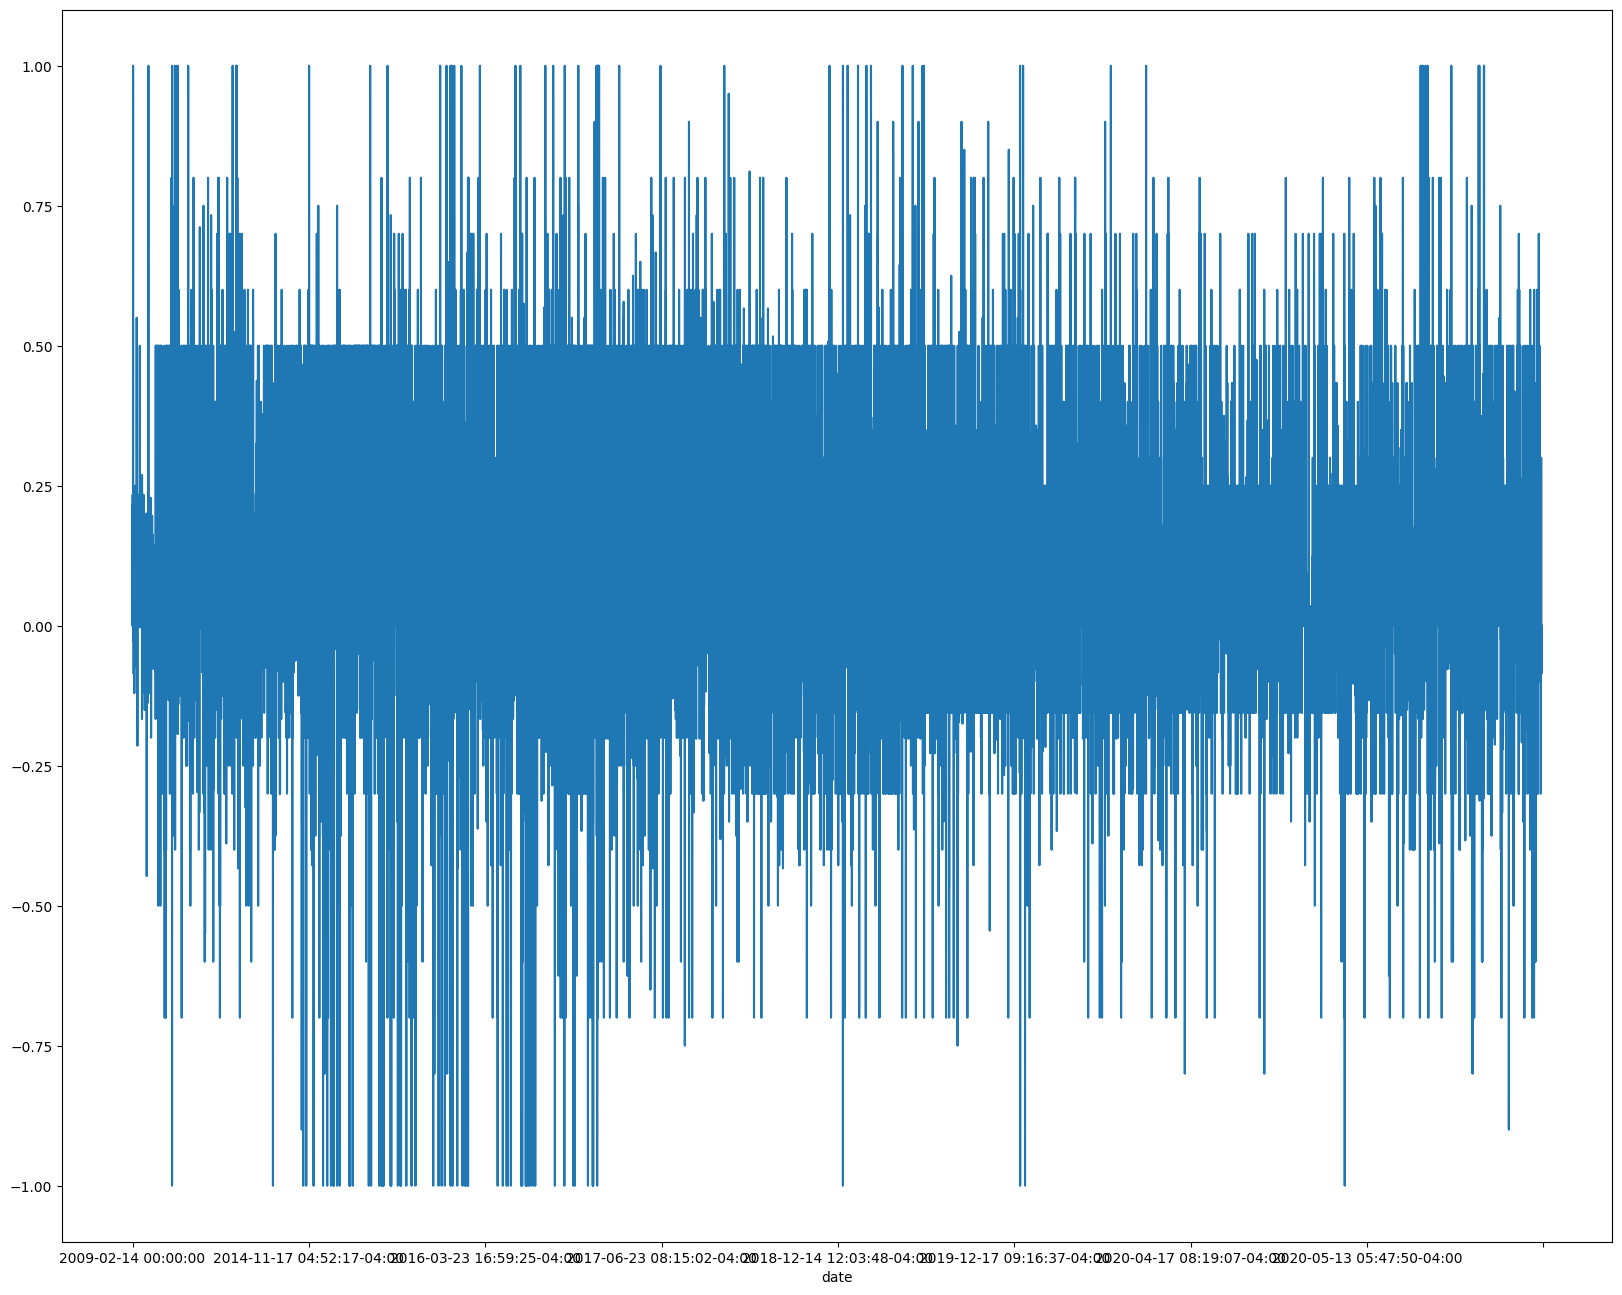

In [16]:
news_data.groupby('date')['sentiment_score'].mean().plot(figsize=(20,16))

Sentiment categories by numbers

In [17]:
numberOfSentimentCategories=news_data['sentiment_score_word'].value_counts()
print(numberOfSentimentCategories)

sentiment_score_word
neutral     934914
positive    341178
negative    131236
Name: count, dtype: int64


Sentiment categories by bar chart

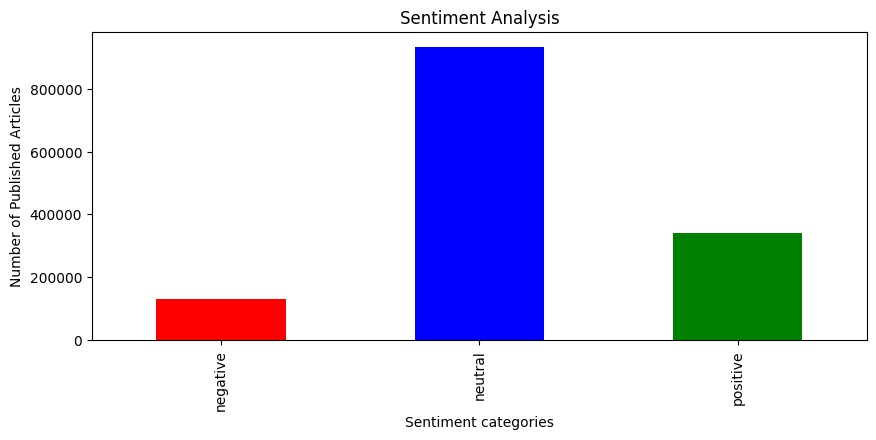

In [18]:
scripts_path = os.path.abspath("../scripts")
if scripts_path not in sys.path:
    sys.path.append(scripts_path)
from scripts.financialAnalysis import numberOfArticlesWithSentimentAnalysis
numberOfArticlesWithSentimentAnalysis(news_data)

Sentiment categories by percentage

In [19]:
numberOfSentiment=news_data['sentiment_score_word'].shape
persentOfCategories = np.round((numberOfSentimentCategories/numberOfSentiment)*100,1)
persentOfCategories.head()

sentiment_score_word
neutral     66.4
positive    24.2
negative     9.3
Name: count, dtype: float64

Topic Modeling

Time Series Analysis:

C:\Users\hanad\AppData\Local\Temp\ipykernel_5492\1301729885.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  news_data['date'].dt.to_period('M').value_counts().sort_index().plot(kind="line",figsize=(20,6),title='number of published article in specific date',xlabel='Year',ylabel='number of publisher')


<Axes: title={'center': 'number of published article in specific date'}, xlabel='Year', ylabel='number of publisher'>

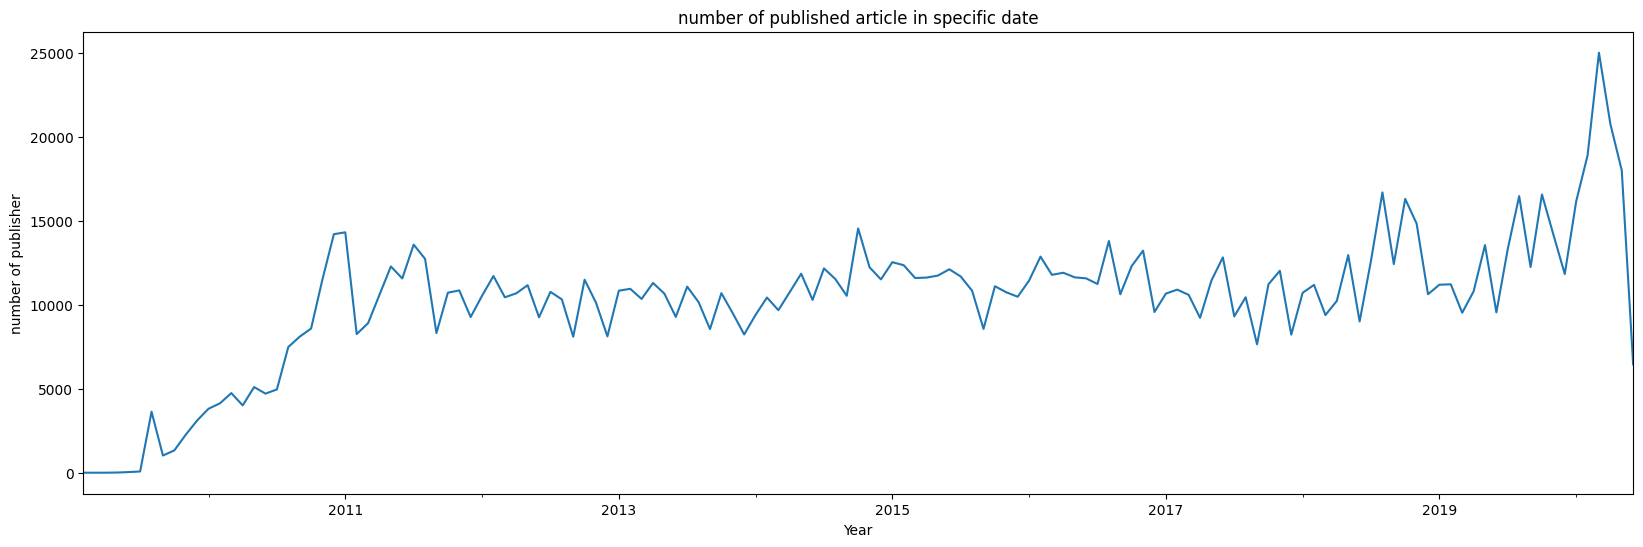

In [20]:
news_data['date'] = pd.to_datetime(news_data['date'], format='ISO8601')

news_data['date'].dt.to_period('M').value_counts().sort_index().plot(kind="line",figsize=(20,6),title='number of published article in specific date',xlabel='Year',ylabel='number of publisher')

# There seem to be specific peak periods where the number of published articles significantly increases. Identifying these periods can provide insights into factors driving the surge in publications.

Publisher Analysis

Number of articles per publisher

In [21]:
publisher_counts = news_data['publisher'].value_counts()
publisher_counts.head(10)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

Show last 10 publisher by number of published articles

In [23]:
publisher_counts.tail(10)

publisher
Goatmug Blog                  1
Christian Fromhertz           1
swenstock                     1
BuyAndHoldPlus                1
Brett's Stock Market Pulse    1
MoneyGeek                     1
muathe                        1
Robert Morris                 1
LeftCoastHedgie               1
Jeremie Capron                1
Name: count, dtype: int64

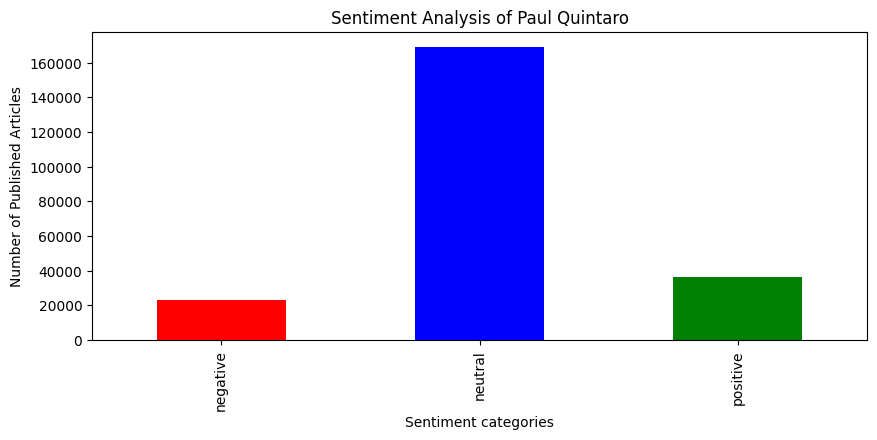

In [24]:
scripts_path = os.path.abspath("../scripts")
if scripts_path not in sys.path:
    sys.path.append(scripts_path)
from scripts.financialAnalysis import getSentimentAnalysisOfPublisher
getSentimentAnalysisOfPublisher(news_data,'Paul Quintaro')

Type of news publisher published (positive, neutral, negative)

In [25]:
publisher_sentiment = news_data.groupby('publisher')['sentiment_score'].mean().sort_index()
publisher_sentiment.head(10)

publisher
47ertrends            0.000000
AARP                  0.012755
ABNNewswire          -0.027816
Aakin                 0.207273
Aaron Jackson.Ed      0.485417
Aaron Levitt          0.050665
Abe Raymond           0.028575
Abhi Rao              0.034365
Abigail Field         0.063021
Above Average Odds    0.144357
Name: sentiment_score, dtype: float64

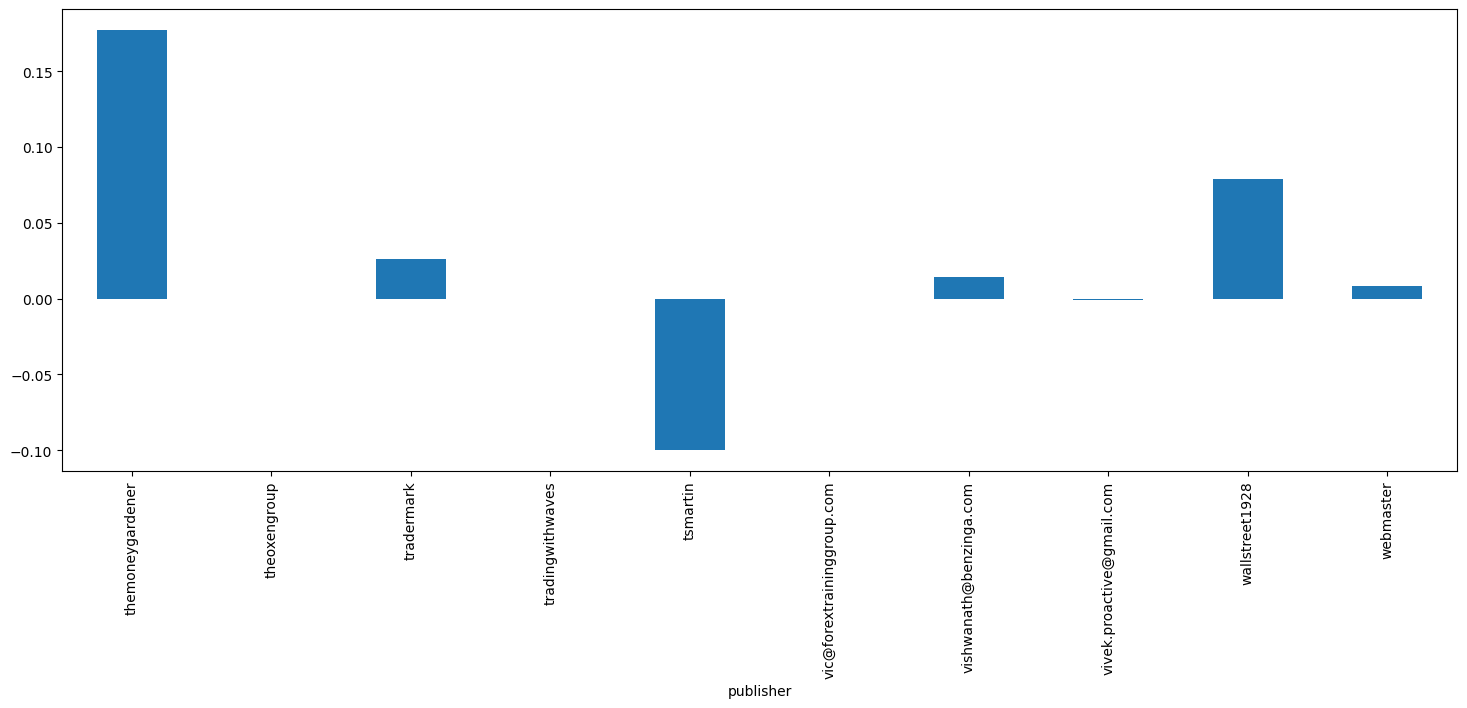

In [26]:
publisher_sentiment.tail(10).plot(kind='bar',figsize=(18,6))
plt.show()

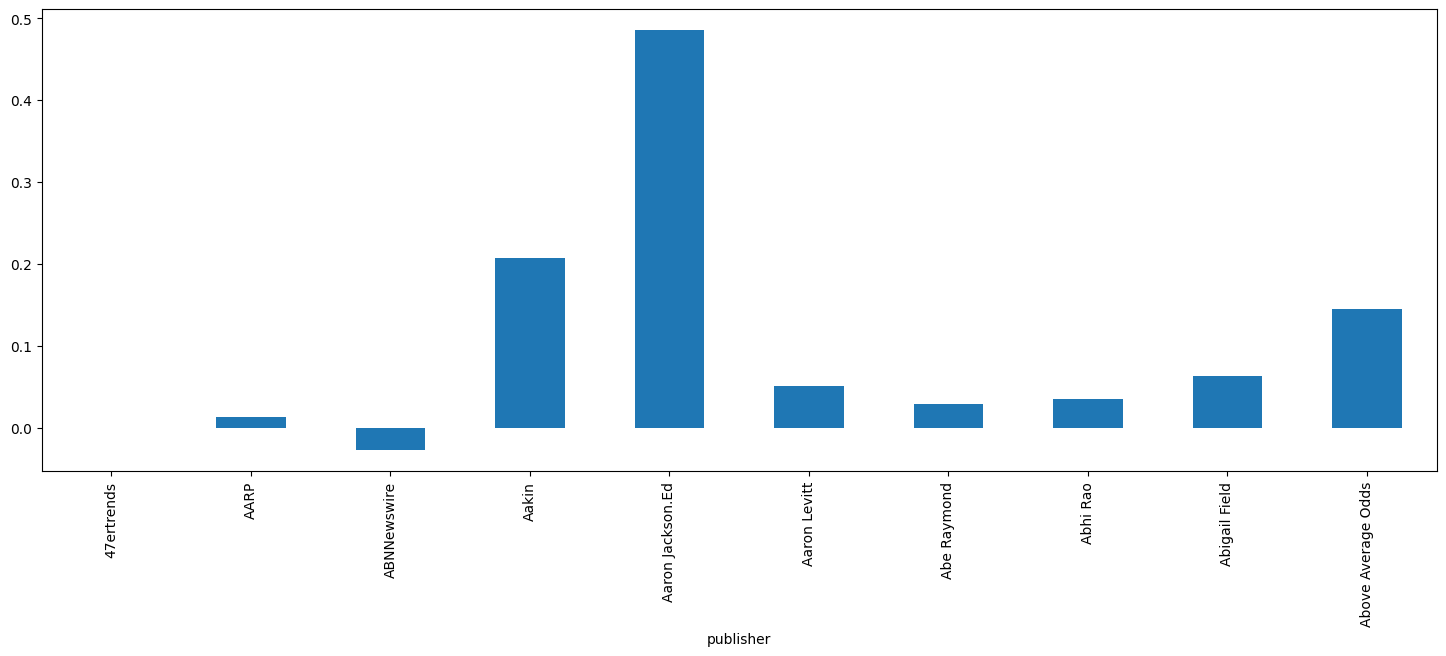

In [27]:
publisher_sentiment.head(10).plot(kind='bar',figsize=(18,6))  # Replace 'line' with 'bar', 'scatter', or other plot types as needed
plt.show()

Quantitative Analysis of Historical Data using pynance and TaLib


Stock Price Data
Historical Data of AAPL:

In [28]:
data_aapl = pd.read_csv('./Data/yfinance_data/AAPL_historical_data.csv')
data_aapl.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097223,48630400,0.0,0.0
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.101954,37363200,0.0,0.0
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.106257,46950400,0.0,0.0
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.111849,48003200,0.0,0.0
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.122173,55574400,0.0,0.0


Historical Data of AMZN:

In [29]:
data_amzn = pd.read_csv('./Data/yfinance_data/AMZN_historical_data.csv')
data_amzn.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0
5,1997-05-22,0.071875,0.072396,0.065625,0.069792,0.069792,235536000,0.0,0.0
6,1997-05-23,0.070313,0.076042,0.066667,0.075000,0.075000,318744000,0.0,0.0
7,1997-05-27,0.075521,0.082292,0.072917,0.079167,0.079167,173952000,0.0,0.0
8,1997-05-28,0.081250,0.081771,0.076563,0.076563,0.076563,91488000,0.0,0.0
9,1997-05-29,0.077083,0.077083,0.073958,0.075260,0.075260,69456000,0.0,0.0


Historical Data of GOOG:

In [30]:
data_goog = pd.read_csv('./Data/yfinance_data/GOOG_historical_data.csv')
data_goog.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0
5,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.684621,142572401,0.0,0.0
6,2004-08-27,2.692408,2.705360,2.632383,2.643840,2.640835,124826132,0.0,0.0
7,2004-08-30,2.622171,2.627402,2.540727,2.540727,2.537839,104429967,0.0,0.0
8,2004-08-31,2.547950,2.583068,2.544463,2.549693,2.546795,98825037,0.0,0.0
9,2004-09-01,2.557912,2.564637,2.482445,2.496891,2.494053,183633734,0.0,0.0


Historical Data of META:

In [31]:
data_meta = pd.read_csv('./Data/yfinance_data/META_historical_data.csv')
data_meta.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0
1,2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0
2,2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0
3,2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0
4,2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0
5,2012-12-19,27.830000,28.219999,26.950001,27.410000,27.353790,61390300,0.0,0.0
6,2012-12-20,27.490000,27.600000,27.129999,27.360001,27.303892,35574800,0.0,0.0
7,2012-12-21,26.660000,27.010000,26.120001,26.260000,26.206148,54555200,0.0,0.0
8,2012-12-24,26.500000,26.959999,26.200001,26.930000,26.874775,28230100,0.0,0.0
9,2012-12-26,27.030001,27.180000,26.379999,26.510000,26.455635,33175400,0.0,0.0


Historical Data of MSFT:

In [32]:
data_msft = pd.read_csv('./Data/yfinance_data/MSFT_historical_data.csv')
data_msft.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0
5,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.058876,58435200,0.0,0.0
6,1986-03-21,0.095486,0.097222,0.091146,0.092882,0.057270,59990400,0.0,0.0
7,1986-03-24,0.092882,0.092882,0.089410,0.090278,0.055665,65289600,0.0,0.0
8,1986-03-25,0.090278,0.092014,0.089410,0.092014,0.056735,32083200,0.0,0.0
9,1986-03-26,0.092014,0.095486,0.091146,0.094618,0.058341,22752000,0.0,0.0


Historical Data of NVDA:

In [33]:
data_nvda = pd.read_csv('./Data/yfinance_data/NVDA_historical_data.csv')
data_nvda.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0
5,1999-01-29,0.041536,0.041667,0.039583,0.039583,0.036307,244032000,0.0,0.0
6,1999-02-01,0.039583,0.040625,0.039583,0.040365,0.037024,154704000,0.0,0.0
7,1999-02-02,0.039583,0.040625,0.036068,0.037240,0.034158,264096000,0.0,0.0
8,1999-02-03,0.036719,0.038542,0.036458,0.038021,0.034874,75120000,0.0,0.0
9,1999-02-04,0.038542,0.041146,0.038021,0.040104,0.036784,181920000,0.0,0.0



Historical Data of TSLA:

In [34]:
data_tesla = pd.read_csv('./Data/yfinance_data/TSLA_historical_data.csv')
data_tesla.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0
5,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,0.0,0.0
6,2010-07-08,1.076000,1.168000,1.038000,1.164000,1.164000,115671000,0.0,0.0
7,2010-07-09,1.172000,1.193333,1.103333,1.160000,1.160000,60759000,0.0,0.0
8,2010-07-12,1.196667,1.204667,1.133333,1.136667,1.136667,33037500,0.0,0.0
9,2010-07-13,1.159333,1.242667,1.126667,1.209333,1.209333,40201500,0.0,0.0


Apply EDA for Stock Price

In [35]:
import sys
import os

scripts_path = os.path.abspath("../scripts")
if scripts_path not in sys.path:
    sys.path.append(scripts_path)
from scripts.financialAnalysis import checkMissingValueOfHistoricalDataset
checkMissingValueOfHistoricalDataset(data_aapl,data_amzn,data_goog,data_meta,data_msft,data_nvda,data_tesla)

Calculate descriptive statistics of Historical data

In [36]:
import sys
import os

scripts_path = os.path.abspath("../scripts")
if scripts_path not in sys.path:
    sys.path.append(scripts_path)
from tabulate import tabulate
from scripts.financialAnalysis import calculateDescriptiveStatisticsOfHistoricalData
statisticsOfHistoricalData = calculateDescriptiveStatisticsOfHistoricalData(data_aapl,data_amzn,data_goog,data_meta,data_msft,data_nvda,data_tesla)
print(tabulate(statisticsOfHistoricalData, headers='keys', tablefmt='psql'))

+-------+--------------+------------+-------------+-------------+-----------+-------------+------------+
|       |         AAPL |       GOOG |        AMZN |        MSFT |      META |        NVDA |       TSLA |
|-------+--------------+------------+-------------+-------------+-----------+-------------+------------|
| count | 10998        | 5020       | 6846        | 9672        | 2926      | 6421        | 3545       |
| mean  |    22.3128   |   45.2745  |   37.3511   |   58.4177   |  179.649  |    6.2077   |   75.4873  |
| std   |    46.0377   |   43.3773  |   53.7299   |   90.1468   |  108.907  |   16.1185   |  102.457   |
| min   |     0.049107 |    2.49091 |    0.069792 |    0.090278 |   22.9    |    0.034115 |    1.05333 |
| 25%   |     0.298549 |   13.0321  |    2.07675  |    5.69531  |   97.3825 |    0.27675  |   11.5653  |
| 50%   |     0.53125  |   27.0059  |    8.5915   |   27.3419   |  166.855  |    0.457    |   17.4593  |
| 75%   |    20.1962   |   60.2803  |   50.4265   |   4